# Transformations géométriques

Pour ceux qui utilisent l'énoncé PDF. Il y a des soucis avec l'intégration de certaines images.

+ Pour l'exercice Rotations et Homothéties, il s'agit du fichier "carres.png"
+ Pour l'exercice Translations, il s'agit du fichier
"cercles.png"

In [2]:
%matplotlib inline
# L'instruction ci-dessus permet d'obtenir les figures dans le notebook
import matplotlib.pyplot as plt # Pour les représentations graphiques
import numpy as np
import math # Pour utiliser la constante pi

## Premières représentations

Exécutez et analysez le code de la cellule ci-dessous :

+ Enlevez le dernier sommet du carré et observez le résultat.
+ Décommentez l'instruction `plt.axis('scaled')` et observez le résultat.

[[ 1  1 -1 -1  1]
 [-1  1  1 -1 -1]]


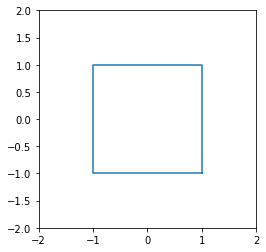

In [3]:
"""
Notez que le carré ci-dessus contient 5 sommets ... 
Le premier est répété afin de "fermer" la figure 
Essayez de supprimer ce dernier point pour observer la différence
"""

K = np.array([[1,1,-1,-1,1],[-1,1,1,-1,-1]]) # Le carré à representer
print (K)

# Premier argument : les abscisses, Second argument : les ordonnées
plt.plot(K[0,:],K[1,:])
plt.axis('scaled')
plt.axis([-2,2,-2,2]) # Limites de la figures xmin,xmax,ymin,ymax

plt.show() # C'est un carré qui n'a pas l'air de l'être ...

## Différentes formes et différentes représentations

Dans la suite des manipulations à faire, vous aurez besoin des figures suivantes :

+ Un triangle isocèle rectangle `IR`
+ Un triangle équilatéral `Tri`
+ Un cercle `C`
+ Un parallèlogramme `Para`

Ces variables/figures sont définies dans la cellule ci-dessous.

+ Affichez successivement ces $4$ figures.
+ Pour le cercle, changez la valeur de $n$ en utilisant : $50, 20, 10, 8, 5$.
+ Décommentez la ligne `print(t)` et observez le contenu de `t` pour chacune des valeurs de $n$ ci-dessus.
+ Remplacez la commande `plot` par la commande `fill` et observez
+ Représentez toutes les figures données sur un même graphique

**Remarques : **

+ L'instruction `np.linspace(a,b,n)` retourne un tableau de $n$ valeurs équitablement réparties dans l'intervalle $\lbrack a,b\rbrack$. La première valeur est toujours $a$, la dernière est toujours $b$.
+ Pour representer plusieurs figures sur un même graphique, il suffit de faire plusieurs `plot` avant le `show`


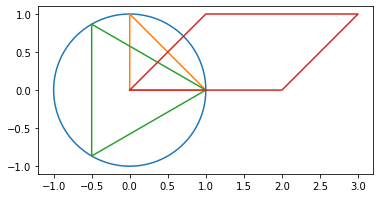

In [4]:
IR = np.array([[1,0,0,1],[0,1,0,0]])
Tri = np.array([ [1,-1/2,-1/2,1],[0,np.sqrt(3)/2,-np.sqrt(3)/2,0] ])

# Construction du cercle
n = 100
t = np.linspace(0,2*math.pi,n)
#print(t)
C = np.array([np.cos(t),np.sin(t)])

Para = np.array([[0,2,3,1,0],[0,0,1,1,0]])


#plt.plot(IR[0,:],IR[1,:])
#plt.axis('scaled')
#plt.show()


#plt.plot(Tri[0,:],Tri[1,:])
#plt.axis('scaled')
#plt.show()


plt.plot(C[0,:], C[1,:])
plt.plot(IR[0,:],IR[1,:])
plt.plot(Tri[0,:],Tri[1,:])
plt.plot(Para[0,:],Para[1,:])
plt.axis('scaled')
plt.show()


#plt.plot(Para[0,:],Para[1,:])
#plt.axis('scaled')
#plt.show()

## Rotations et Hométhéties

+ Ecrivez une fonction `R(theta)` qui retourne la **matrice** de rotation du plan d'angle `theta` de centre $(0,0)$.
+ Ecrivez une fonction `H(k)` qui retourne la **matrice** d'homothétie du plan de rapport `k` de centre $(0,0)$.

**Indication : l'usage de vos fonctions doit être le suivant : `newK = H(2) @ K`.
Alors la variable `newK` contient l'image du carré `K` par l'homothétie de centre $(0,0)$ et de rapport $2$.**

Réalisez la figure ci-dessous pour tester vos fonctions :

<img src="carres.png" />

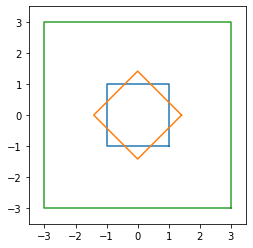

In [5]:
def R(theta):
    rotation = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta), math.cos(theta)]])
    return rotation 

def H(k):
    homothetie = np.array ([[k, 0],[0, k]])
    return homothetie

newK = R(math.pi/4) @ K
homothetie = H(3) @ K


plt.plot(K[0,:],K[1,:])
plt.plot(newK[0,:],newK[1,:])
plt.plot(homothetie[0,:],homothetie[1,:])
plt.axis('scaled')
plt.axis([-3.5,3.5,-3.5,3.5])
plt.show()

## Translations

+ Ecrivez une fonction `T(u, F)` qui retourne le translaté de la figure `F` par la translation de vecteur `u`. 
Le vecteur `u` doit être un `np.array` de deux lignes et une colonne. 

**Notez que le fonctionnement est différent des fonctions précédentes. 
L'usage sera `newC = T(U, C)` et après cette instruction la variable `newC` contient l'image de `C` par la translation de vecteur `U`.**

Réalisez la figure ci-dessous pour tester votre fonction :

<img src="cercles.png" />

**Indication : ** La fonction `np.ones` peut vous simplifier la tâche.

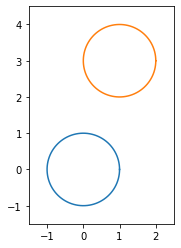

In [6]:
def T(u, F):
    Fprim = F + u
    return Fprim

newC = T(np.array([[1],[3]]),C)

plt.plot(C[0,:],C[1,:])
plt.plot(newC[0,:],newC[1,:])
plt.axis('scaled')
plt.axis([-1.5,2.5,-1.5,4.5])
plt.show()

## Projections et Symétries

**Attention, cette partie est plus difficile. Pour réussir, il me parrait indispensable de réaliser des calculs "papier-crayon" avant de chercher à coder. Utilisez les exemples de cours et TD pour vous aider**

+ Ecrivez une fonction `Pr(a)` qui retour la **matrice** de la projection orthogonale sur la droite d'équation $y = ax$.
+ Ecrivez une fonction `S(a)` qui retour la **matrice** de la symétrie orthogonale par rapport à droite d'équation $y = ax$.

**Indications : **

+ L'usage de vos fonctions doit être le suivant : `newK = S(2) @ K`.
Alors la variable `newK` contient l'image du carré `K` par la symétrie d'axe d'équation $y = 2x$.
Le fonctionnement est le même que pour les rotations et homothéties.
+ Pour la symétrie, utilisez la projection.
+ Testez vos fonctions avec les exemples du cours et du TD
+ Vérifiez que les projections satisfont $P^2 = P$ et les symétries $S^2 = I$.

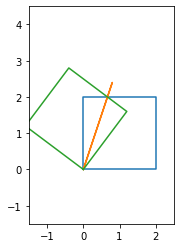

[[0.02 0.14]
 [0.14 0.98]]
[[ 0.96 -0.28]
 [-0.28 -0.96]]


In [8]:
def Pr(a):
    projection = np.array ([[1.0/(a**2 + 1.0), a/(a**2 + 1.0)],[a/(a**2 + 1.0), a**2/(a**2 + 1.0)]])
    return projection 

def S(a):
    P = Pr(a)
    symetrie = 2*P - np.array([[1, 0], [0, 1]])
    return symetrie

K = np.array([[0,2,2,0,0],[0,0,2,2,0]])
newK = Pr(3) @ K
symK = S(3) @ K


plt.plot(K[0,:],K[1,:])
plt.plot(newK[0,:],newK[1,:])
plt.plot(symK[0,:],symK[1,:])
plt.axis('scaled')
plt.axis([-1.5,2.5,-1.5,4.5])
plt.show()


print (Pr(7))
print (S(-1/7))

Sur Moodle :

+ les fonctions `R(theta)` et `H(k)`
+ la fonction `T(u, F)`
+ les fonctions `Pr(a)` et `S(a)`

Au prochain TP, ces matrices de transformations seront utilisées sur des exemples.

# FIN !